In [1]:
# 실제 이미지 전처리하고 돌리는 법 (고양이와 강아지 사진 구분하기)

# kaggle에서 data파일 다운 받기 (my account -> create new api 파일 다운 받고 경로 넣기)
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'   # api(kaggle.json) 파일 경로 

!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 537M/544M [00:06<00:00, 122MB/s]
100% 544M/544M [00:06<00:00, 91.9MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 152MB/s]
 95% 257M/271M [00:03<00:00, 86.8MB/s]
100% 271M/271M [00:04<00:00, 70.4MB/s]


In [4]:
# 파일 압축 풀기
!unzip -q train.zip -d .

replace ./train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
import os
import tensorflow as tf
import shutil


# image classification 문제에서는 dataset 폴더 나누는 것 관례  ex) dataset > cat, dog, human...
# 모든 고양이 사진은 cat 폴더, 모든 강아지 사진은 dog 폴더로 분류

# 1. 일단 train 안의 모든 파일명 출력
# 이미지 파일 개수 출력
print( len(os.listdir('/content/train/')))    # os.listdir : 모든 파일명이 리스트에 담김

# 2. 파일명에 cat이라는 문자가 들어있으면 cat 폴더로 옮김 (dog는 dog폴더로)
# 디렉터리 만들기
os.mkdir('/content/dataset')    
os.mkdir('/content/dataset/cat')
os.mkdir('/content/dataset/dog')

for i in os.listdir('/content/train/'):
  if 'cat' in i:
    shutil.copyfile('/content/train/' + i, '/content/dataset/cat/' + i)   # data 복사붙여넣기	# shutil.copyfile(현재경로, 옮기고싶은경로)
  if 'dog' in i:
    shutil.copyfile('/content/train/' + i, '/content/dataset/dog/' + i)



25000


In [10]:
# 파이썬에서 디렉터리 삭제 방법
# %rm -rf dataset

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
<BatchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)>
tf.Tensor(
[[[[0.08425054 0.02934857 0.02542701]
   [0.0788603  0.02395833 0.02003676]
   [0.09209559 0.04895834 0.03327206]
   ...
   [0.06710516 0.02360026 0.00803654]
   [0.07450981 0.01960784 0.01568628]
   [0.00392923 0.00803654 0.00392923]]

  [[0.1010972  0.0501168  0.02658739]
   [0.119267   0.06828661 0.0447572 ]
   [0.06590265 0.03845167 0.01492226]
   ...
   [0.07071079 0.02720588 0.01164216]
   [0.06977443 0.01487247 0.0109509 ]
   [0.00349839 0.01146408 0.00509153]]

  [[0.09571078 0.04473039 0.01335784]
   [0.09761029 0.0466299  0.01525735]
   [0.07900965 0.066142   0.03922909]
   ...
   [0.07178692 0.02703546 0.01188726]
   [0.0753753  0.02147863 0.01722197]
   [0.00857843 0.01602137 0.00982307]]

  ...

  [[0.3947572  0.32857114 0.24108073]
 

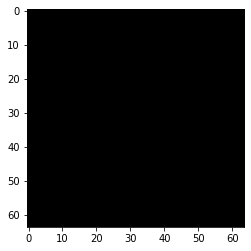

In [17]:
# 이미지 숫자화
# 1. opencv 라이브러리로 이미지 숫자화하기
# 2. tf.keras 이용해서 한번에 처리 (폴더내 image들을 바로 dataset으로 만듦)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',    # 데이터 경로
    image_size=(64,64),     # 모든 이미지가 64x64 픽셀로 전처리됨
    batch_size=64,          # 이미지 2만장 한번에 넣지 않고, batch 숫자만큼만 한번에 넣음 (보통 32, 64..)
    subset='training',      # data 이름 설정 : training data 이므로 80% data 가짐
    validation_split=0.2,   # data 중 20%를 validation data로 설정 (validation data : 학습 도중 다른 데이터로 테스트)
    seed=1234               # batch 뽑을 때 랜덤해서 뽑는데 seed를 적용해주면 seed가 똑같으면 같이 뽑힘
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',    
    image_size=(64,64),     
    batch_size=64,          
    subset='validation',    # data 이름 설정 : validation data 이므로 20% data 가짐
    validation_split=0.2,   
    seed=1234
)

print(train_ds)     # train_ds : ( (이미지 2만개), (정답 2만개) )


def 전처리함수(i, 정답):
  i = tf.cast(i/255.0, tf.float32)    # 자료의 타입 강제하기
  return i, 정답

# 이미지는 0~255숫자 가짐 => 이걸 0~1로 압축시키는 전처리 과정을 통해 오래 걸리는 학습 시간 줄임
train_ds = train_ds.map(전처리함수)     # map : train_ds 데이터에 전부 전처리함수를 적용시켜줌
val_ds = val_ds.map(전처리함수)


# 데이터셋 출력해보기

#import matplotlib.pyplot as plt
#for i, 정답 in train_ds.take(1):    # 64개씩 들어있는 batch들의 모음에서 하나(이미지,정답)를 뽑음
#    print(i)
#    print(정답)
#    # 첫번째 이미지(강아지 사진) 미리보기
#    plt.imshow(i[0].numpy().astype('uint8'))    
#    plt.show()


In [18]:
# 모델 만들기   
# Conv2d나 Dense 더 추가해도 운으로 정확도 조금 상승하는 경우 허다함. 가장 중요한 건 데이터의 전처리(퀄리티)임. 
#  => 1.데이터 양을 늘리거나, 2.데이터의 질을 늘리는게 더 큰 영향 미침
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D( 32, (3,3), padding="same", activation='relu', input_shape=(64, 64, 3) ),   # 칼라 이미지라서 3으로 설정   # 흑백사진데이터 : [0,0,..0]...[0,0,..0]  # 칼라사진데이터 : [[0,0,0][0,0,0][0,0,0]]...[[R,G,B][0,0,0][0,0,0]]
    tf.keras.layers.MaxPooling2D( (2,2) ),   
    # 학습 효과 높이기 위해 분석 여러번하기
    tf.keras.layers.Conv2D( 64, (3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D( (2,2) ),
    tf.keras.layers.Dropout(0.2),     # 학습데이터 반복을 많이해서 외워버려 평가가 좋으나 처음보는 validation set에서는 평가 떨어지는 overfitting 현상 완화하기 위해 쓰는 것 => Dropout 레이어    # 윗레이어의 노드 20%를 제거해줌
    tf.keras.layers.Conv2D( 128, (3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D( (2,2) ),  
    tf.keras.layers.Flatten(),                          
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid"),     # 개인지 고양이인지 구분하는 문제 : 0~1 사이 값 출력 (확률)  # binary_crossentropy에서는 sigmoid activation function을 맨 마지막에 필요로 함
])

# 모델 아웃라인 출력해보기 : 모델 잘짰는지 확인
model.summary()     

# 2. 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# 3. 모델 fit하기 (학습)
model.fit(train_ds, validation_data=val_ds, epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)      